# Meta analysis - how well of a job did the bank do?
Pie chart of loan type/ grade

Distribution graph / histogram of cli and stuff like that

Are these upper class loans? or middle class loans or low class loans

overlapping histogram of salaries and CLI

home ownership status vs interest rate and vs grade

# Technical loan analysis
How does the last credit pull matter?

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

DATA = './data/'
df = pd.read_csv(f'{DATA}Columbia_EDA.csv')
df.head()

,id,member_id,CLI,term,int_rate,installment$,grade,sub_grade,emp_title,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,mths_since_last_delinq
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,...,861.07,0.00,0.00,0.00,15-Jan,171.62,16-Jan,1,INDIVIDUAL,NaN
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,1,INDIVIDUAL,NaN
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,...,603.65,0.00,0.00,0.00,14-Jun,649.91,16-Jan,1,INDIVIDUAL,NaN
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,2209.33,16.97,0.00,0.00,15-Jan,357.48,15-Jan,1,INDIVIDUAL,35.0
4,1075358,1311748,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,1009.07,0.00,0.00,0.00,16-Jan,67.79,16-Jan,1,INDIVIDUAL,38.0


# Part 1 - Data cleaning

In [64]:
df.columns

Index(['id', 'member_id', 'CLI', 'term', 'int_rate', 'installment$', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'debt to income', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'mths_since_last_delinq'],
      dtype='object')

# Part 2 - Meta Analysis

(-1.1233428010807713,
 1.1250575764713757,
 -1.1030518255780744,
 1.1037122716503283)

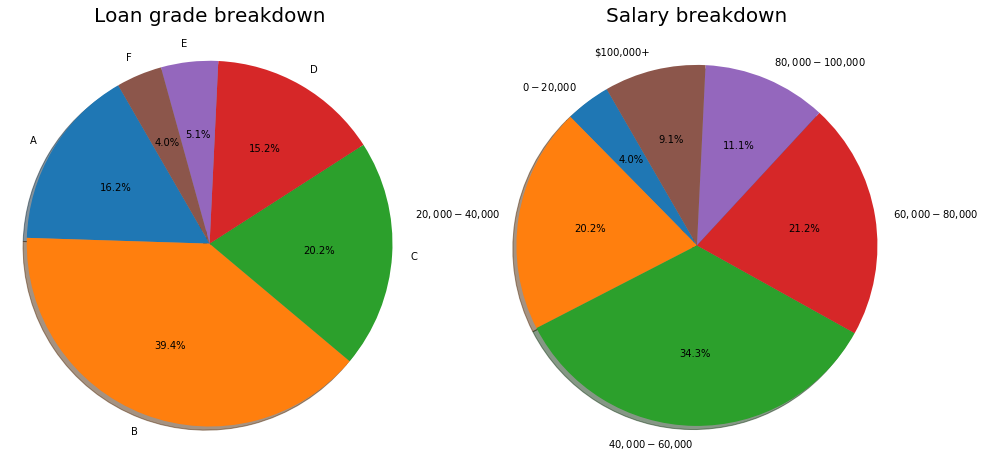

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot loan percent pie chart
labels = ['A', 'B', 'C', 'D', 'E', 'F']
sizes = df.groupby(['grade'])['grade'].count()
ax[0].set_title('Loan grade breakdown', fontsize=20)
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=120)
ax[0].axis('equal')

# Plot salary pie chart
bins = [
    (0, 20000),
    (20000, 40000),
    (40000, 60000),
    (60000, 80000),
    (80000, 100000),
    (100000, 1000000),
]

salary_labels = [
    '$0 - $20,000',
    '$20,000 - $40,000',
    '$40,000 - $60,000',
    '$60,000 - $80,000',
    '$80,000 - $100,000',
    '$100,000+',
]

# Calc percent of salaries in each bin
count = []
for i in range(len(bins)):
    tally = 0
    for income in df['annual_inc']:
        if income >= bins[i][0] and income < bins[i][1]:
            tally += 1
    count.append(tally)
count = list(map(lambda x : x / 99, count))

ax[1].set_title('Salary breakdown', fontsize=20)
ax[1].pie(count, labels=salary_labels, autopct='%1.1f%%', shadow=True, startangle=120)
ax[1].axis('equal')

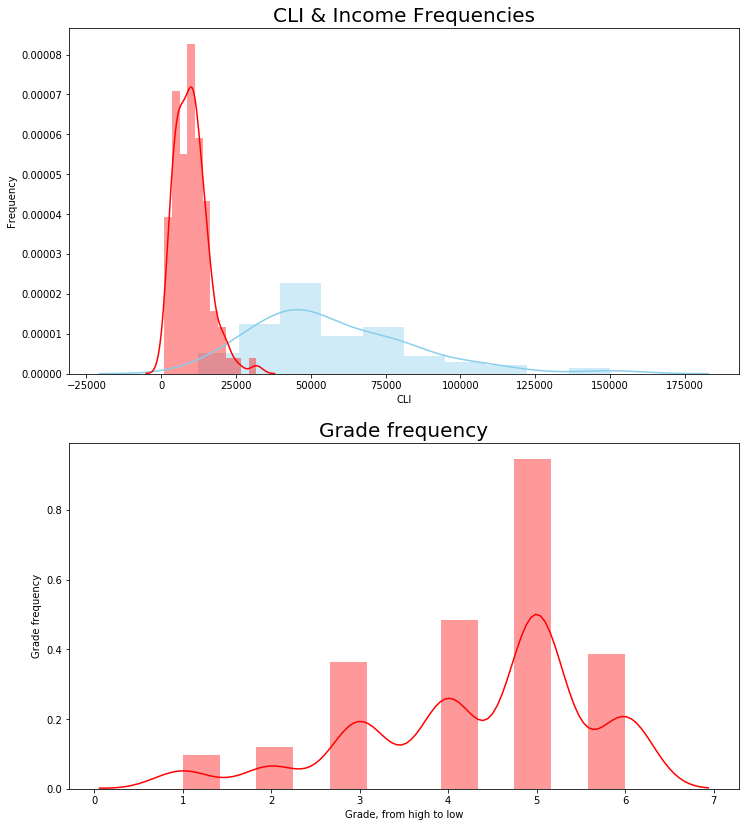

In [162]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Overlapping histogram of salaries and CLI
ax[0].set_title('CLI & Income Frequencies', fontsize=20)
ax[0].set_xlabel('CLI & Income')
ax[0].set_ylabel('Frequency')

sns.distplot(df['annual_inc'] , color='skyblue', ax=ax[0])
sns.distplot(df['CLI'] , color='red', ax=ax[0])

# Histogram of loan grade
ax[1].set_title('Grade frequency', fontsize=20)
ax[1].set_xlabel('Grade, from high to low')
ax[1].set_ylabel('Grade frequency')
numerical_grade = list(map(lambda g : 6 - (ord(g) - 65), df['grade']))
sns.distplot(numerical_grade, color='red', ax=ax[1])

Text(0, 0.5, 'CLI percent of income')

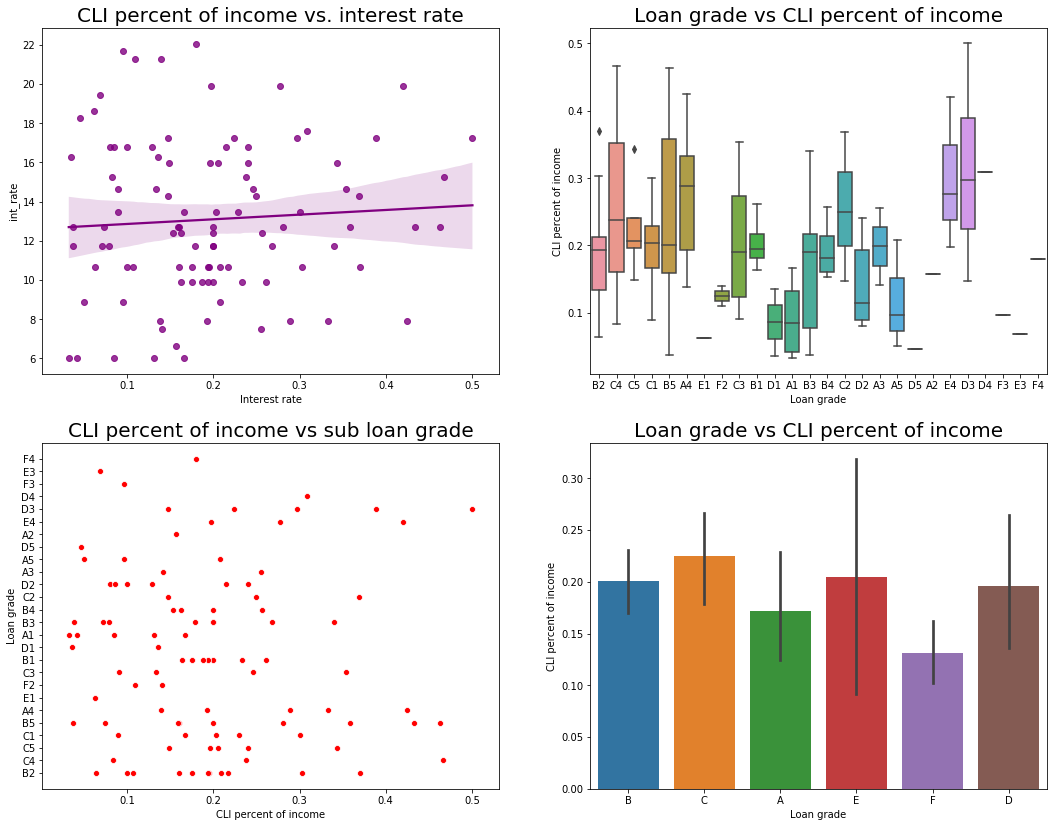

In [202]:
# CLI percent of income vs interest rate
fig, ax = plt.subplots(2, 2, figsize=(18, 14))
intc_comp = df.loc[:, ['annual_inc', 'CLI', 'int_rate']]

x = [] # x axis (cli/annual_inc)
y = intc_comp['int_rate'] # y axis (interest rate)

for row in intc_comp.iterrows():
    cli_p_of_income = row[1]['CLI'] / row[1]['annual_inc']
    x.append(cli_p_of_income)
    
numerical_sub_grade = df['sub_grade']

sns.regplot(x, y, ax=ax[0][0], color='purple')
ax[0][0].set_title('CLI percent of income vs. interest rate', fontsize=20)
ax[0][0].set_xlabel('CLI percent of income')
ax[0][0].set_xlabel('Interest rate')

sns.boxplot(df['sub_grade'], x, ax=ax[0][1])
ax[0][1].set_title('Loan grade vs CLI percent of income', fontsize=20)
ax[0][1].set_xlabel('Loan grade')
ax[0][1].set_ylabel('CLI percent of income')

sns.scatterplot(x, numerical_sub_grade, ax=ax[1][0], color='red')
ax[1][0].set_title('CLI percent of income vs sub loan grade', fontsize=20)
ax[1][0].set_xlabel('CLI percent of income')
ax[1][0].set_ylabel('Loan grade')

sns.barplot(df['grade'], x, ax=ax[1][1])
ax[1][1].set_title('Loan grade vs CLI percent of income', fontsize=20)
ax[1][1].set_xlabel('Loan grade')
ax[1][1].set_ylabel('CLI percent of income')